#              **Introduction of Gemini AI Models**


Gemini is a new AI model developed through collaboration between teams at Google, including Google Research and Google DeepMind. It was built specifically to be multimodal, meaning it can understand and work with different types of data like text, code, audio, images, and video.

Gemini is the most advanced and largest AI model developed by Google to date. It has been designed to be highly flexible so that it can operate efficiently on a wide range of systems, from data centers to mobile devices. This means that it has the potential to revolutionize the way in which businesses and developers can build and scale AI applications.

Here are three versions of the Gemini model designed for different use cases:

*   **Gemini Ultra:** Largest and most advanced AI capable of performing complex tasks.
*   **Gemini Pro:** A balanced model that has good performance and scalability.


*   **Gemini Nano:** Most efficient for mobile devices.


In this notebook, we will learn about the Gemini API and how to set it up on your machine. We will also explore various Python API functions, including text generation and image understanding.

# Setting up for free **Gemini API**
For using the API, we have to first get an API key.
Please go to the below website for getting the API key
https://ai.google.dev/tutorials/setup


Click on "Get an API key" button

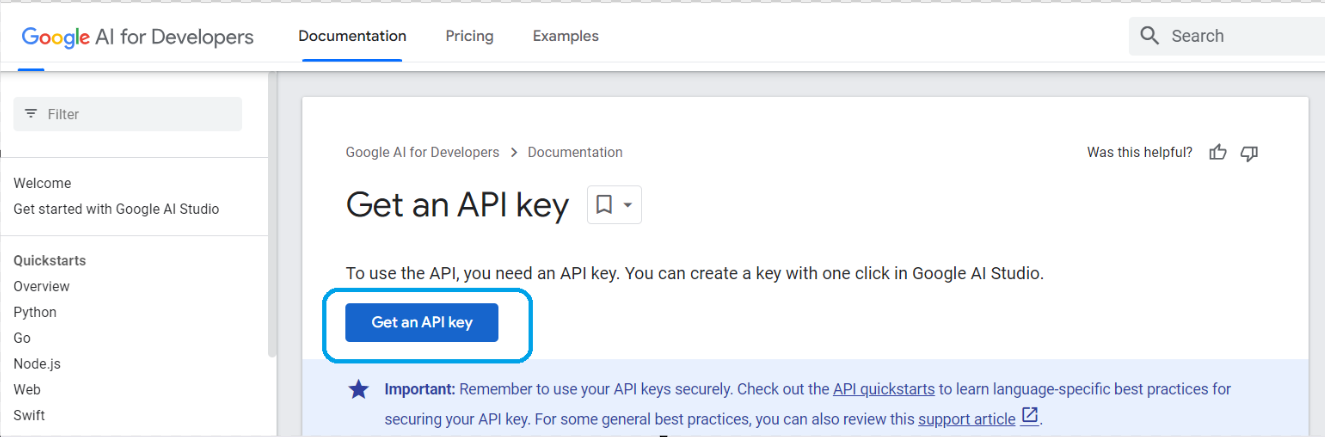


And then click on "Create API key in new project".

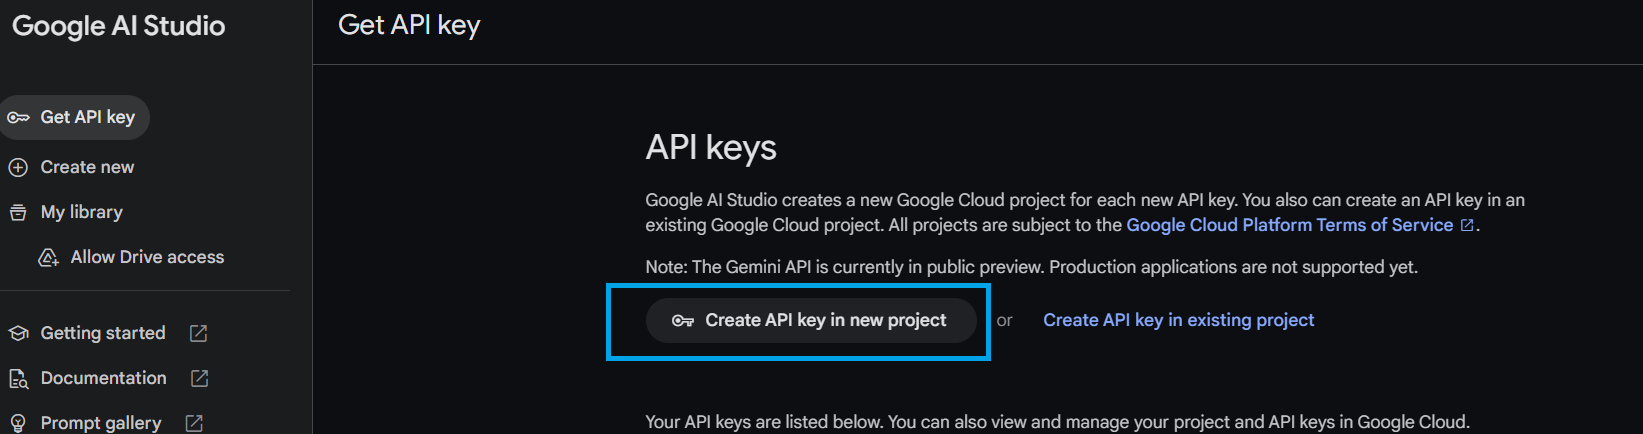


Now, Copy the API key.

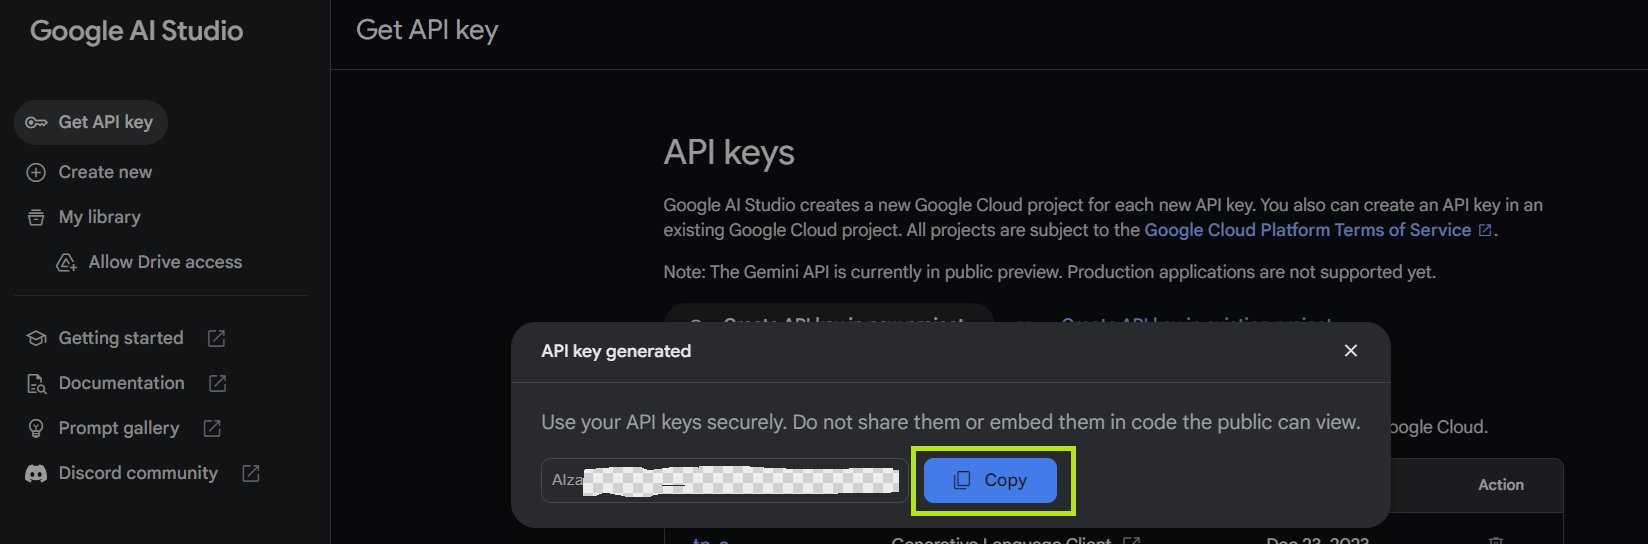


# Now, I am using Googal Colab for more exploration with Gemini-Pro


Install "google-generativeai" first in the system

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 1.6 MB/s eta 0:00:00


Provide your gemini_api_key, that you copied from above task.

In [3]:
import google.generativeai as genai

gemini_api_key = 'your gemini api key'
genai.configure(api_key = gemini_api_key)

We can some questions here.

In [4]:
from IPython.display import Markdown

model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Who is the prime minister of India?")

Markdown(response.text)

Narendra Modi

We can also ask for writing code in Python.

In [5]:
response = model.generate_content("Build a simple snake game in Python")

Markdown(response.text)

```python
import pygame
import random

# Initialize pygame
pygame.init()

# Set the game screen size
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))

# Set the game title
pygame.display.set_caption("Snake")

# Define the snake's initial position and size
snake_position = [100, 50]
snake_body = [[100, 50], [90, 50], [80, 50]]
snake_length = 3

# Define the speed and direction of the snake
snake_speed = 10
snake_direction = 'RIGHT'

# Define the food's position
food_position = [300, 300]
food_spawned = False

# Set the game clock
clock = pygame.time.Clock()

# Set the game loop flag
running = True

# Main game loop
while running:
    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                snake_direction = 'UP'
            elif event.key == pygame.K_DOWN:
                snake_direction = 'DOWN'
            elif event.key == pygame.K_LEFT:
                snake_direction = 'LEFT'
            elif event.key == pygame.K_RIGHT:
                snake_direction = 'RIGHT'

    # Move the snake
    if snake_direction == 'UP':
        snake_position[1] -= snake_speed
    elif snake_direction == 'DOWN':
        snake_position[1] += snake_speed
    elif snake_direction == 'LEFT':
        snake_position[0] -= snake_speed
    elif snake_direction == 'RIGHT':
        snake_position[0] += snake_speed

    # Check if the snake has eaten the food
    if snake_position == food_position:
        food_spawned = False
        snake_length += 1

    # Spawn a new food item if it hasn't been spawned yet
    if not food_spawned:
        food_position = [random.randint(0, SCREEN_WIDTH - 10), random.randint(0, SCREEN_HEIGHT - 10)]
        food_spawned = True

    # Move the snake's body
    snake_body.insert(0, list(snake_position))
    if len(snake_body) > snake_length:
        snake_body.pop()

    # Check if the snake has hit itself or the walls
    for body_part in snake_body[1:]:
        if snake_position == body_part:
            running = False
    if snake_position[0] < 0 or snake_position[0] > SCREEN_WIDTH - 10 or snake_position[1] < 0 or snake_position[1] > SCREEN_HEIGHT - 10:
        running = False

    # Draw the game screen
    screen.fill((0, 0, 0))
    for body_part in snake_body:
        pygame.draw.rect(screen, (255, 255, 255), pygame.Rect(body_part[0], body_part[1], 10, 10))
    pygame.draw.rect(screen, (255, 0, 0), pygame.Rect(food_position[0], food_position[1], 10, 10))

    # Update the display
    pygame.display.update()

    # Set the clock speed
    clock.tick(60)

# Quit pygame
pygame.quit()
```

We can get the information on providing an image as well.

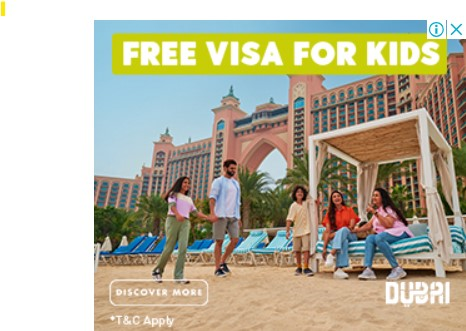

In [7]:
import PIL.Image

img = PIL.Image.open('10011.jpg')

img

In [10]:
model = genai.GenerativeModel('gemini-pro-vision')

response = model.generate_content(img)

Markdown(response.text)

 The advertisement says "Free Visa for Kids". But there's a catch. You have to book a hotel first.